In [2]:
import os
import tensorflow as tf
import keras
from keras import models
from keras import layers
from keras import optimizers
from datetime import datetime
from PIL import Image
import numpy as np
import keras.backend as K
import matplotlib.pyplot as plt
import mlflow
from tensorflow.keras.utils import plot_model

In [3]:
#Clear GPU memory and set up the logging of the experiment with mlflow
K.clear_session()
mlflow.set_experiment('capstone_project')
mlflow.autolog()

2023/05/29 14:00:55 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.


In [4]:
batch_size = 32

In [5]:
image_size = (255, 255)
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'private_dataset',
    validation_split=0.15,
    subset="training",
    label_mode = 'int',
    labels = 'inferred',
    seed=1336,
    image_size=image_size,
    interpolation = 'bilinear',
    batch_size=batch_size,
    shuffle = True,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    'private_dataset',
    validation_split=0.15,
    subset="validation",
    label_mode = 'int',
    labels = 'inferred',
    seed=1336,
    image_size=image_size,
    interpolation = 'bilinear',
    batch_size=batch_size,
    shuffle = True,
)


Found 1772 files belonging to 3 classes.
Using 1507 files for training.
Found 1772 files belonging to 3 classes.
Using 265 files for validation.


In [6]:
imput = (255,255,3)

In [7]:
imput = (255,255,3)

model=models.Sequential()

model.add(layers.Rescaling(scale = 1./255, offset=0.0, input_shape=imput))

# Para el dataset publico no hago augmentation porque ya esta hecho
#model.add(layers.RandomFlip("horizontal_and_vertical"))
#model.add(layers.RandomRotation(0.2))
#model.add(layers.RandomZoom(0.2))
#model.add(layers.RandomContrast(0.2))

#Estas me petan la dimension de entrada a la densa. Debería haber un resizing 
# model.add(layers.RandomWidth(0.2))
# model.add(layers.RandomHeight(0.2))


model.add(layers.Conv2D(filters=32, kernel_size=(2,2), activation='relu',))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=64, kernel_size=(2,2), activation='relu',))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=128, kernel_size=(2,2), activation='relu',))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=256, kernel_size=(2,2), activation='relu',))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=512, kernel_size=(2,2), activation='relu',))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))


# Add flatten layer
model.add(layers.Flatten())

# Add dense/dropout layers + activation functions

model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(3, activation = 'softmax'))

adam = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

model.compile(optimizer = adam, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.summary()

# plot_model(model, to_file='model.png', show_shapes=True,  rankdir='LR')




Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 255, 255, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 254, 254, 32)      416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 126, 126, 64)      8256      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 62, 128)       32896     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 128)       0

In [8]:
folder_date = 'old_models/' +  datetime.now().strftime("%Y_%m_%d-%I_%M_%S_%p")
os.mkdir(folder_date)
filepath_model = folder_date + '/my_best_model.epoch{epoch:02d}-loss{val_loss:.2f}.hdf5'


# Callbacks

In [9]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
filepath=filepath_model,
save_weights_only=False,
monitor='val_accuracy',
mode='max',
save_freq="epoch",
save_best_only=True)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4, mode='auto', verbose = 1, )

In [10]:
epochs = 60
history = model.fit(
    train_ds, epochs=epochs, validation_data=val_ds, callbacks=[model_checkpoint_callback]
)

2023/05/29 14:01:13 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '3b40efbc1be44e59b1a4b71f06462819', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current tensorflow workflow


Epoch 1/60
48/48 [==============================] - 25s 254ms/step - loss: 1.0590 - accuracy: 0.4121 - val_loss: 0.8769 - val_accuracy: 0.5509
Epoch 2/60
48/48 [==============================] - 10s 199ms/step - loss: 0.9621 - accuracy: 0.5109 - val_loss: 0.9313 - val_accuracy: 0.3698
Epoch 3/60
48/48 [==============================] - 9s 173ms/step - loss: 0.8470 - accuracy: 0.5647 - val_loss: 0.7509 - val_accuracy: 0.5623
Epoch 4/60
48/48 [==============================] - 9s 173ms/step - loss: 0.7128 - accuracy: 0.6350 - val_loss: 0.6047 - val_accuracy: 0.7283
Epoch 5/60
48/48 [==============================] - 9s 176ms/step - loss: 0.6010 - accuracy: 0.7512 - val_loss: 0.6049 - val_accuracy: 0.7132
Epoch 6/60
48/48 [==============================] - 9s 174ms/step - loss: 0.5864 - accuracy: 0.7472 - val_loss: 0.7004 - val_accuracy: 0.7170
Epoch 7/60
48/48 [==============================] - 9s 174ms/step - loss: 0.4990 - accuracy: 0.8069 - val_loss: 0.4447 - val_accuracy: 0.8642
Epoc

2023/05/29 14:11:10 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\diosdadj\Anaconda3\envs\ml\lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils."


In [11]:
#Guardo el modelo en la última epoch. Esto 
model.save(folder_date + '/modelo_entrenado.h5')


In [12]:
history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [13]:
folder_date + "/accuracy.png"

'old_models/2023_05_29-02_01_11_PM/accuracy.png'

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


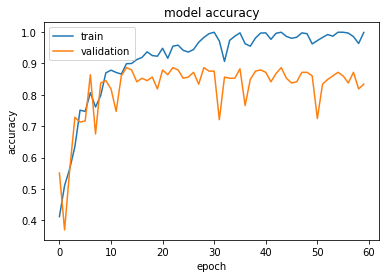

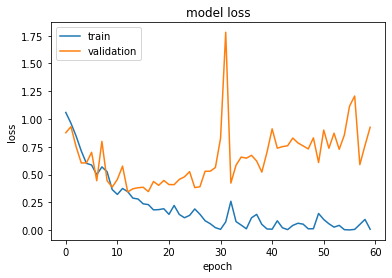

In [14]:
print(history.history.keys())

#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig(folder_date + "/accuracy.png")
plt.show()

# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig(folder_date + "/loss.png")
plt.show()





Preguntas, cómo puedo gestionar datos que vienen de dos distribuciones distintas?



# This is a section to evaluate the model on te test data

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_recall_fscore_support


2023/05/29 14:11:26 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.


[2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


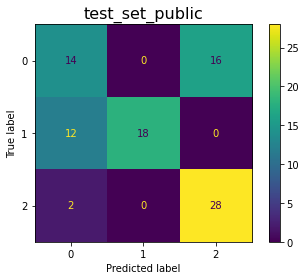

In [16]:
# Load the test images from the folder 'test_images'
predicted_labels= []
true_labels = []

directory = "test_set_public"

for filename in os.listdir(directory):

    # Load the image and add it to the list of test images
    f = os.path.join(directory, filename)
    imagen = tf.keras.preprocessing.image.load_img(f, target_size=(255,255))
    x = tf.keras.preprocessing.image.img_to_array(imagen)    
    x = np.expand_dims(x, axis=0)



    prediction = model.predict(x)    

    predicted_class = np.argmax(prediction)

    #True labels are calculated based on name. It is a very weak way of doing it. Look for a better one or rename the files

    if 'aca' in filename:
        true_labels.append(0)
    elif 'scc' in filename or ' e ' in filename:
        true_labels.append(2)
    elif 'lungn' or ' N ' in filename:
        true_labels.append(1)
   
    

    predicted_labels.append(predicted_class)

print(predicted_labels)
print(true_labels)


cm = confusion_matrix(true_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
precision_recall_fscore_support(true_labels, predicted_labels)


disp.plot()
plt.title(directory,  fontdict={'fontsize': 16})  # Set the new title for the plot
plt.show()



#Predice mal en las muestras de Henar. Veremos con el nuevo dataset, pero quizá haya que hacer un training con peso Opciones:

Undersample the larger distribution: randomly remove examples from the larger distribution until it matches the size of the smaller one.

Oversample the smaller distribution: randomly duplicate examples from the smaller distribution until it matches the size of the larger one.

Data augmentation: generate new examples from the smaller distribution using techniques like rotation, flipping, or zooming.

Use class weights: adjust the loss function of your CNN to assign higher weights to the smaller distribution so that it receives more emphasis during training.

Fine-tuning: you could use a pre-trained model to initialize the weights and only fine-tune the last few layers to fit the imbalanced data.

1. Domain shift
2. 

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


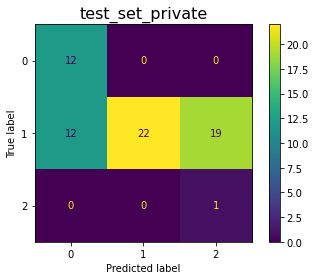

In [17]:
# Load the test images from the folder 'test_images'
predicted_labels= []
true_labels = []

directory = "test_set_private"

for filename in os.listdir(directory):

    # Load the image and add it to the list of test images
    f = os.path.join(directory, filename)
    imagen = tf.keras.preprocessing.image.load_img(f, target_size=(255,255))
    x = tf.keras.preprocessing.image.img_to_array(imagen)    
    x = np.expand_dims(x, axis=0)



    prediction = model.predict(x)    

    predicted_class = np.argmax(prediction)

    #True labels are calculated based on name. It is a very weak way of doing it. Look for a better one or rename the files

    if 'aca' in filename:
        true_labels.append(0)
    elif 'scc' in filename or ' e ' in filename:
        true_labels.append(2)
    elif 'lungn' or ' N ' in filename:
        true_labels.append(1)
   
    

    predicted_labels.append(predicted_class)

print(predicted_labels)
print(true_labels)


cm = confusion_matrix(true_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
precision_recall_fscore_support(true_labels, predicted_labels)


disp.plot()
plt.title(directory,  fontdict={'fontsize': 16})  # Set the new title for the plot
plt.show()
